In [1]:
import tensorflow as tf

In [2]:
c = tf.constant(2,name='c')
x = tf.Variable(3,name='x')
y = tf.Variable(c*x,name='y')

In [3]:
print(x)
print(y)

<tf.Variable 'x:0' shape=() dtype=int32_ref>
<tf.Variable 'y:0' shape=() dtype=int32_ref>


In [4]:
X = tf.placeholder("int32")
Y = tf.placeholder("int32")


In [5]:
model = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

6


In [6]:
import numpy as np
t = np.arange(9).reshape((3,3))
print(t)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [7]:
tensor = tf.convert_to_tensor(t, dtype=tf.int32)

In [8]:
with tf.Session() as sess:
   print(sess.run(tensor))


[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [9]:
t0 = tf.zeros((3,3),'float64')

In [10]:
with tf.Session() as session:
    print(session.run(t0))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [11]:
t1 = tf.ones((3,3),'float64')

In [12]:
with tf.Session() as session:
    print(session.run(t1))

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [13]:
tensorrand = tf.random_uniform((3, 3), minval=0, maxval=1, dtype=tf.float32)

In [14]:
with tf.Session() as session:
    print(session.run(tensorrand))


[[ 0.23529065  0.94629061  0.78508461]
 [ 0.1326803   0.34222937  0.07499647]
 [ 0.30431211  0.11213958  0.72429335]]


In [15]:
norm = tf.random_normal((3, 3), mean=0, stddev=3)

In [16]:
with tf.Session() as session:
    print(session.run(norm))


[[ 1.50575781  0.29254037 -4.7842865 ]
 [-1.10053539  1.82978404 -3.91513872]
 [ 1.072317   -0.42533118 -0.09797287]]


In [17]:
t1 = tf.random_uniform((3, 3), minval=0, maxval=1, dtype=tf.float32)
t2 = tf.random_uniform((3, 3), minval=0, maxval=1, dtype=tf.float32)

In [18]:
with tf.Session() as sess:
    print('t1 = ',sess.run(t1))
    print('t2 = ',sess.run(t2))

t1 =  [[ 0.15637171  0.91241419  0.6265887 ]
 [ 0.4066335   0.76144099  0.18374431]
 [ 0.59261668  0.63377452  0.63247728]]
t2 =  [[ 0.2456187   0.07070899  0.01038361]
 [ 0.89071929  0.5403806   0.13453126]
 [ 0.4072572   0.72879398  0.03496265]]


In [19]:
sum = tf.add(t1,t2)
mul = tf.matmul(t1,t2)

In [20]:
with tf.Session() as sess:
    print('sum =', sess.run(sum))
    print('mul =', sess.run(mul))

sum = [[ 0.706038    1.28301334  0.19649673]
 [ 0.98367655  1.13871896  1.81580138]
 [ 1.08846235  1.81781852  0.35328352]]
mul = [[ 1.01903796  1.12746143  1.07219756]
 [ 1.10262644  1.47867703  1.15581965]
 [ 1.05736542  1.34841466  1.14849663]]


In [21]:
det = tf.matrix_determinant(t1)
with tf.Session() as sess:
    print('det =', sess.run(det))

det = 0.171305


# Single Layer Perceptron (SLP)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [23]:
#Training set
inputX = np.array([[1.,3.],[1.,2.],[1.,1.5],[1.5,2.],[2.,3.],[2.5,1.5],[2.,1.],[3.,1.],[3.,2.],[3.5,1.],[3.5,3.]])
inputY = [[1.,0.]]*6+ [[0.,1.]]*5
print(inputX)
print(inputY)


[[ 1.   3. ]
 [ 1.   2. ]
 [ 1.   1.5]
 [ 1.5  2. ]
 [ 2.   3. ]
 [ 2.5  1.5]
 [ 2.   1. ]
 [ 3.   1. ]
 [ 3.   2. ]
 [ 3.5  1. ]
 [ 3.5  3. ]]
[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]


[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


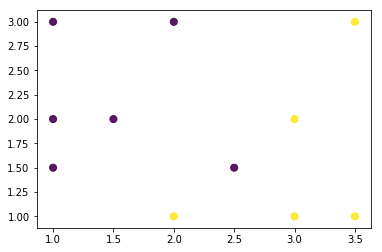

In [24]:
yc = [0]*6 + [1]*5
print(yc)
plt.scatter(inputX[:,0],inputX[:,1],c=yc, s=50, alpha=0.9)
plt.show()

In [25]:
learning_rate = 0.01

In [26]:
training_epochs = 2000

In [27]:
display_step = 50

In [28]:
n_samples = 11
batch_size = 11
total_batch = int(n_samples/batch_size)


In [29]:
n_input = 2 # size data input (# size of each element of x)
n_classes = 2 # n of classes


In [30]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


In [31]:
# Set model weights
W = tf.Variable(tf.zeros([n_input, n_classes])) 
b = tf.Variable(tf.zeros([n_classes]))


In [32]:
evidence = tf.add(tf.matmul(x, W), b) 

In [33]:
y_ = tf.nn.softmax(evidence)

In [34]:
cost = tf.reduce_sum(tf.pow(y-y_,2))/ (2 * n_samples)

In [35]:
optimizer =tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [36]:
avg_set = []
epoch_set=[]

In [37]:
init = tf.global_variables_initializer()

In [38]:
with tf.Session() as sess:
    sess.run(init)
        
    for i in range(training_epochs):
        sess.run(optimizer, feed_dict = {x: inputX, y: inputY})
        if i % display_step == 0:
            c = sess.run(cost, feed_dict = {x: inputX, y: inputY})
            print("Epoch:", '%04d' % (i), "cost=", "{:.9f}".format(c))
            avg_set.append(c)
            epoch_set.append(i + 1)
    
    print("Training phase finished")
     
    training_cost = sess.run(cost, feed_dict = {x: inputX, y: inputY})
    print("Training cost = ", training_cost, "\nW=", sess.run(W), "\nb=", sess.run(b))
    last_result = sess.run(y_, feed_dict = {x:inputX})
    print("Last result = ",last_result)   

Epoch: 0000 cost= 0.249360308
Epoch: 0050 cost= 0.221041128
Epoch: 0100 cost= 0.198898271
Epoch: 0150 cost= 0.181669712
Epoch: 0200 cost= 0.168204829
Epoch: 0250 cost= 0.157555178
Epoch: 0300 cost= 0.149002746
Epoch: 0350 cost= 0.142023861
Epoch: 0400 cost= 0.136240512
Epoch: 0450 cost= 0.131378993
Epoch: 0500 cost= 0.127239138
Epoch: 0550 cost= 0.123672642
Epoch: 0600 cost= 0.120568059
Epoch: 0650 cost= 0.117840447
Epoch: 0700 cost= 0.115424201
Epoch: 0750 cost= 0.113267884
Epoch: 0800 cost= 0.111330733
Epoch: 0850 cost= 0.109580085
Epoch: 0900 cost= 0.107989430
Epoch: 0950 cost= 0.106537104
Epoch: 1000 cost= 0.105205171
Epoch: 1050 cost= 0.103978693
Epoch: 1100 cost= 0.102845162
Epoch: 1150 cost= 0.101793952
Epoch: 1200 cost= 0.100816071
Epoch: 1250 cost= 0.099903718
Epoch: 1300 cost= 0.099050261
Epoch: 1350 cost= 0.098249927
Epoch: 1400 cost= 0.097497642
Epoch: 1450 cost= 0.096789025
Epoch: 1500 cost= 0.096120209
Epoch: 1550 cost= 0.095487759
Epoch: 1600 cost= 0.094888613
Epoch: 165

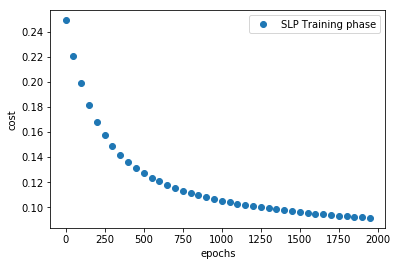

In [39]:
plt.plot(epoch_set,avg_set,'o',label = 'SLP Training phase')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()


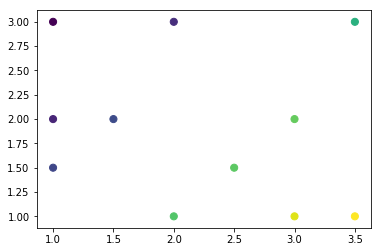

In [40]:
yc = last_result[:,1]
plt.scatter(inputX[:,0],inputX[:,1],c=yc, s=50, alpha=1)
plt.show()

In [41]:
#Testing set
testX = np.array([[1.,2.25],[1.25,3.],[2,2.5],[2.25,2.75],[2.5,3.],[2.,0.9],[2.5,1.2],[3.,1.25],[3.,1.5],[3.5,2.],[3.5,2.5]])
testY = [[1.,0.]]*5 + [[0.,1.]]*6
print(testX)
print(testY)


[[ 1.    2.25]
 [ 1.25  3.  ]
 [ 2.    2.5 ]
 [ 2.25  2.75]
 [ 2.5   3.  ]
 [ 2.    0.9 ]
 [ 2.5   1.2 ]
 [ 3.    1.25]
 [ 3.    1.5 ]
 [ 3.5   2.  ]
 [ 3.5   2.5 ]]
[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


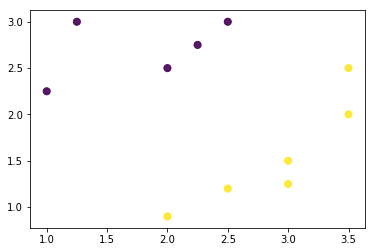

In [42]:
yc = [0]*5 + [1]*6
print(yc)
plt.scatter(testX[:,0],testX[:,1],c=yc, s=50, alpha=0.9)
plt.show()

In [43]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
        
    for i in range(training_epochs):
        sess.run(optimizer, feed_dict = {x: inputX, y: inputY})
    
    pred = tf.nn.softmax(evidence) 
    result = sess.run(pred, feed_dict = {x: testX})
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(testY, 1))
     
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: testX, y: testY}))


    
    

Accuracy: 1.0


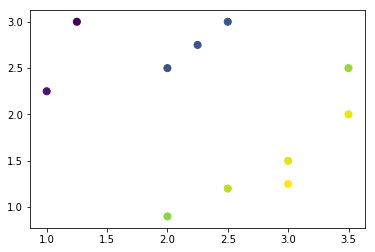

In [44]:
yc = result[:,1]
plt.scatter(testX[:,0],testX[:,1],c=yc, s=50, alpha=1)
plt.show()


# Multi Layer Perceptron

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
 
#Training set
inputX = np.array([[1.,3.],[1.,2.],[1.,1.5],[1.5,2.],[2.,3.],[2.5,1.5],[2.,1.],[3.,1.],[3.,2.],[3.5,1.],[3.5,3.]])
inputY = [[1.,0.]]*6+ [[0.,1.]]*5

learning_rate = 0.001
training_epochs = 2000
display_step = 50
n_samples = 11
batch_size = 11
total_batch = int(n_samples/batch_size)


In [46]:
# Network Parameters
n_hidden_1 = 2 # 1st layer number of neurons
#n_hidden_2 = 0 # 2nd layer number of neurons
n_input = 2 # size data input
n_classes = 2 # classes


In [47]:
# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])


In [48]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    #'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    #'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [49]:
# Create model
def multilayer_perceptron(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    #layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer


In [50]:
# Construct model
evidence = multilayer_perceptron(X)
y_ = tf.nn.softmax(evidence)

In [51]:
# Define cost and optimizer
cost = tf.reduce_sum(tf.pow(Y-y_,2))/ (2 * n_samples)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [52]:
avg_set = []
epoch_set = []
init = tf.global_variables_initializer()


In [53]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_cost = 0.
        # Loop over all batches
        for i in range(total_batch):
            #batch_x, batch_y = inputdata.next_batch(batch_size) TO BE IMPLEMENTED
            batch_x = inputX
            batch_y = inputY
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
            avg_set.append(avg_cost)
            epoch_set.append(epoch + 1)
     
    print("Training phase finished")
    last_result = sess.run(y_, feed_dict = {X: inputX})
    training_cost = sess.run(cost, feed_dict = {X: inputX, Y: inputY})
    print("Training cost = ", training_cost)  
    print("Last result = ", last_result)

Epoch: 0001 cost=0.534337342
Epoch: 0051 cost=0.500344753
Epoch: 0101 cost=0.306632668
Epoch: 0151 cost=0.105975978
Epoch: 0201 cost=0.101429604
Epoch: 0251 cost=0.098237276
Epoch: 0301 cost=0.095216267
Epoch: 0351 cost=0.092416212
Epoch: 0401 cost=0.089862444
Epoch: 0451 cost=0.087560482
Epoch: 0501 cost=0.085503258
Epoch: 0551 cost=0.083676644
Epoch: 0601 cost=0.082062371
Epoch: 0651 cost=0.080640934
Epoch: 0701 cost=0.079392508
Epoch: 0751 cost=0.078297973
Epoch: 0801 cost=0.077339657
Epoch: 0851 cost=0.076501206
Epoch: 0901 cost=0.075768046
Epoch: 0951 cost=0.075126931
Epoch: 1001 cost=0.074566215
Epoch: 1051 cost=0.074075654
Epoch: 1101 cost=0.073646285
Epoch: 1151 cost=0.073270097
Epoch: 1201 cost=0.072940253
Epoch: 1251 cost=0.072650768
Epoch: 1301 cost=0.072396383
Epoch: 1351 cost=0.072172567
Epoch: 1401 cost=0.071975328
Epoch: 1451 cost=0.071801312
Epoch: 1501 cost=0.071647525
Epoch: 1551 cost=0.071511410
Epoch: 1601 cost=0.071390741
Epoch: 1651 cost=0.071283557
Epoch: 1701 co

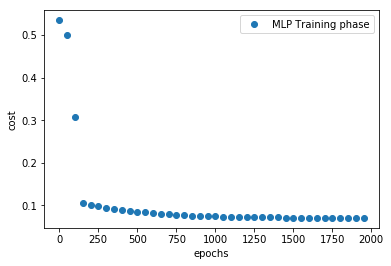

In [54]:
plt.plot(epoch_set,avg_set,'o',label = 'MLP Training phase')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [55]:
#Testing set
testX = np.array([[1.,2.25],[1.25,3.],[2,2.5],[2.25,2.75],[2.5,3.],[2.,0.9],[2.5,1.2],[3.,1.25],[3.,1.5],[3.5,2.],[3.5,2.5]])
testY = [[1.,0.]]*5 + [[0.,1.]]*6

In [56]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_x = inputX
            batch_y = inputY
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})
   
    # Test model
    pred = tf.nn.softmax(evidence) # Apply softmax to logits
    result = sess.run(pred, feed_dict = {X: testX})
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: testX, Y: testY}))

print("Result = ", result)

Accuracy: 1.0
Result =  [[ 0.99140078  0.0085992 ]
 [ 0.99558431  0.00441568]
 [ 0.90339947  0.09660055]
 [ 0.8767277   0.12327233]
 [ 0.84396356  0.15603639]
 [ 0.31285295  0.68714702]
 [ 0.15288183  0.84711814]
 [ 0.04270549  0.95729452]
 [ 0.0667615   0.93323845]
 [ 0.0397305   0.96026951]
 [ 0.09616365  0.90383631]]


[ 0.0085992   0.00441568  0.09660055  0.12327233  0.15603639  0.68714702
  0.84711814  0.95729452  0.93323845  0.96026951  0.90383631]


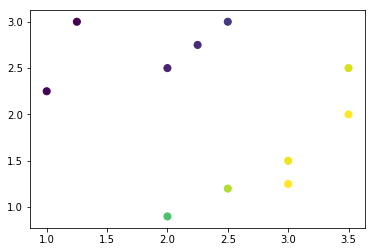

In [57]:
yc = result[:,1]
print(yc)
plt.scatter(testX[:,0],testX[:,1],c=yc, s=50, alpha=1)
plt.show()

# Multi Layer Perceptron 2 

In [58]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
 
#Training set
inputX = np.array([[1.,3.],[1.,2.],[1.,1.5],[1.5,2.],[2.,3.],[2.5,1.5],[2.,1.],[3.,1.],[3.,2.],[3.5,1.],[3.5,3.]])
inputY = [[1.,0.]]*6+ [[0.,1.]]*5

learning_rate = 0.001
training_epochs = 2000
display_step = 50
n_samples = 11
batch_size = 11
total_batch = int(n_samples/batch_size)

# Network Parameters
n_hidden_1 = 4 # 1st layer number of neurons
n_hidden_2 = 2 # 2nd layer number of neurons
n_input = 2 # size data input
n_classes = 2 # classes

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Create model
def multilayer_perceptron(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    #out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out_layer

# Construct model
evidence = multilayer_perceptron(X)
y_ = tf.nn.softmax(evidence)

# Define cost and optimizer
cost = tf.reduce_sum(tf.pow(Y-y_,2))/ (2 * n_samples)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

avg_set = []
epoch_set = []
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_cost = 0.
        # Loop over all batches
        for i in range(total_batch):
            #batch_x, batch_y = inputdata.next_batch(batch_size) TO BE IMPLEMENTED
            batch_x = inputX
            batch_y = inputY
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
            avg_set.append(avg_cost)
            epoch_set.append(epoch + 1)
     
    print("Training phase finished")
    last_result = sess.run(y_, feed_dict = {X: inputX})
    training_cost = sess.run(cost, feed_dict = {X: inputX, Y: inputY})
    print("Training cost = ", training_cost)  
    print("Last result = ", last_result)

Epoch: 0001 cost=0.545439422
Epoch: 0051 cost=0.545054793
Epoch: 0101 cost=0.525345564
Epoch: 0151 cost=0.361239076
Epoch: 0201 cost=0.257665217
Epoch: 0251 cost=0.199745610
Epoch: 0301 cost=0.152912512
Epoch: 0351 cost=0.122265637
Epoch: 0401 cost=0.104842111
Epoch: 0451 cost=0.094705105
Epoch: 0501 cost=0.088475905
Epoch: 0551 cost=0.084430106
Epoch: 0601 cost=0.081639968
Epoch: 0651 cost=0.079590552
Epoch: 0701 cost=0.077994257
Epoch: 0751 cost=0.076691091
Epoch: 0801 cost=0.075593010
Epoch: 0851 cost=0.074652053
Epoch: 0901 cost=0.073841967
Epoch: 0951 cost=0.073147491
Epoch: 1001 cost=0.072558440
Epoch: 1051 cost=0.072066076
Epoch: 1101 cost=0.071661890
Epoch: 1151 cost=0.071336523
Epoch: 1201 cost=0.071080148
Epoch: 1251 cost=0.070882477
Epoch: 1301 cost=0.070733428
Epoch: 1351 cost=0.070623577
Epoch: 1401 cost=0.070544362
Epoch: 1451 cost=0.070488550
Epoch: 1501 cost=0.070450030
Epoch: 1551 cost=0.070423998
Epoch: 1601 cost=0.070406795
Epoch: 1651 cost=0.070395678
Epoch: 1701 co

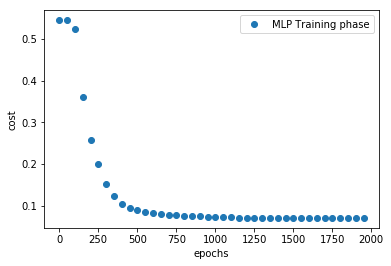

In [59]:
plt.plot(epoch_set,avg_set,'o',label = 'MLP Training phase')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()



In [60]:
#Testing set
testX = np.array([[1.,2.25],[1.25,3.],[2,2.5],[2.25,2.75],[2.5,3.],[2.,0.9],[2.5,1.2],[3.,1.25],[3.,1.5],[3.5,2.],[3.5,2.5]])
testY = [[1.,0.]]*5 + [[0.,1.]]*6

In [61]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_x = inputX
            batch_y = inputY
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})

   
    # Test model
    pred = tf.nn.softmax(evidence) # Apply softmax to logits
    result = sess.run(pred, feed_dict = {X: testX})
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: testX, Y: testY}))

print("Result = ", result)

Accuracy: 1.0
Result =  [[ 0.98936862  0.01063137]
 [ 0.99353611  0.00646387]
 [ 0.88723266  0.11276741]
 [ 0.85200977  0.1479902 ]
 [ 0.80816388  0.19183606]
 [ 0.36763456  0.63236541]
 [ 0.18352009  0.81647992]
 [ 0.05467953  0.94532043]
 [ 0.07995348  0.92004651]
 [ 0.04446219  0.9555378 ]
 [ 0.09504602  0.90495396]]


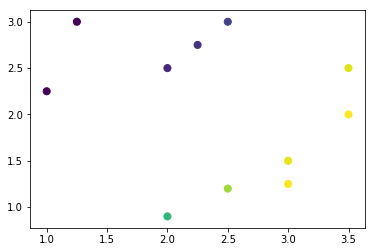

In [62]:
yc = result[:,1]
plt.scatter(testX[:,0],testX[:,1],c=yc, s=50, alpha=1)
plt.show()

# Test2

In [63]:
test = 3*np.random.random((1000,2))
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_x = inputX
            batch_y = inputY
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})

   
    # Test model
    pred = tf.nn.softmax(evidence) 
    result = sess.run(pred, feed_dict = {X: test})

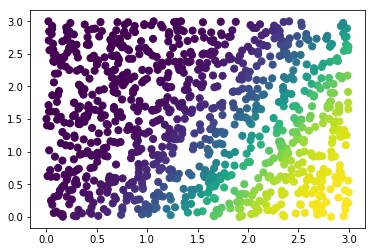

In [64]:
yc = result[:,1]
plt.scatter(test[:,0],test[:,1],c=yc, s=50, alpha=1)
plt.show()

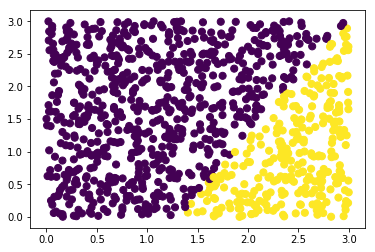

In [65]:
yc = np.round(result[:,1])
plt.scatter(test[:,0],test[:,1],c=yc, s=50, alpha=1)
plt.show()